# Modelling

In this notebook, we will apply various vectorizers and classifiers and analyse which one predicts the best and what are the words that were good in classifying the posts.

In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix

from wordcloud import WordCloud, STOPWORDS

from nltk.tokenize import RegexpTokenizer 
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import stopwords

from bs4 import BeautifulSoup    
import regex as re

In [2]:
#Read the cleaned and combined csv
df = pd.read_csv('apple_galaxy_df.csv')


In [3]:
df.head(100)

,title,selftext,subreddit,title_text,text_len
0,Annoying isn't it,,1,annoying,8
1,I think I might have a problem,,1,think might problem,19
2,california poppy vibes,,1,california poppy vibe,21
3,Wanted to make something nice to brighten up m...,,1,wanted make something nice brighten day,39
4,One of my favorite small things about having a...,,1,one favorite small thing apple watch setting s...,119
...,...,...,...,...,...
95,My Review Of The Apple Watch Series 6 Lte Comi...,\n\nWhy? \n\n1. I Had the Opportunity to go t...,1,review apple watch series lte coming galaxy wa...,1108
96,Apple Watch - to cut back on phone usage?,I’m hopelessly addicted to my phone and all of...,1,apple watch cut back phone usage hopelessly ad...,779
97,Apple Watch walkie talkie and workout buddies?,"I need Apple Watch buddies, keep me motivated ...",1,apple watch walkie talkie workout buddy need a...,124
98,I know this has been done before on this sub b...,,1,know done sub cool way start day,32


In [4]:
df['subreddit'].value_counts(normalize=True)

1    0.558873
0    0.441127
Name: subreddit, dtype: float64

Since applewatch and galaxywatch posts account for approximately 50% of the subreddit posts, we can say that we have relatively balanced classes.

### Customise Stopwords

The goal of stopwords are to remove frequently-occurring words that are presumed to be less informative to the meaning of the documents and therefore have no value in helping to select documents, such as the, and, to, etc.Some of the words in both subreddits were more explicit in predicting the subreddits. Therefore will update all those words with the stopwords.

In [5]:
#Adding additional stopwords as these are more explicit in predicting the subreddits
#'iphone','gw','aw','samsung',
new_list_stops = ['apple','apple watch','galaxy','galaxy watch','watch']

In [6]:
custom_stop_words = stopwords.words('english')
custom_stop_words.extend(new_list_stops)
custom_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Train Test Split data

In [7]:
# Import train_test_split.
from sklearn.model_selection import train_test_split

# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(df['title_text'],
                                                    df['subreddit'],
                                                    test_size = 0.25,
                                                    random_state = 42,stratify = df['subreddit'])

# Modelling

We will use different combinations of Vectorizers and classifiers. The models were evaluated based on their accuracy scores on unseen validation data, before the best performing model was used to score the test data.

### 1.Logistic Regression with CountVectorizer

In [8]:
# Set up Pipeline 1
pipe1 = Pipeline([
    ('cvec', CountVectorizer(stop_words=custom_stop_words)),
    ('lr', LogisticRegression()),
])

In [9]:
pipe_params = {
    'cvec__max_features': [2000,3000,4000,5000],
    'cvec__min_df': [1,2],
    'cvec__max_df': [0.9,0.95],
    'cvec__ngram_range': [(1,1),(1,2)],
}

In [10]:
gs1 = GridSearchCV(pipe1, 
                   param_grid=pipe_params, 
                   cv=5)



In [11]:
gs1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [12]:
gs1.best_score_

0.8211990650784264

In [13]:
gs1.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [14]:
gs1_model = gs1.best_estimator_

In [15]:
print(gs1_model.score(X_train,y_train))
print(gs1_model.score(X_test,y_test))

#append the scores to a list for model comparison
results = list()
result_1 =gs1_model.score(X_train,y_train)
result_2=gs1_model.score(X_test,y_test)

results.append({'Model':'Lr+CV',
                'Trainscore': result_1,
               'Testscore': result_2})

0.9759579263711495
0.8265765765765766


In [16]:
pd.DataFrame(results)

,Model,Trainscore,Testscore
0,Lr+CV,0.975958,0.826577


The model shows some overfitting as it performs very well on training data but not on validation data. Therefore will use TfIdf vectorizer with logistic regression and evaluate how it performs on validation set.

### 2.Logistic Regression with TfidfVectorizer

In [17]:
# Set up Pipeline 2
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=custom_stop_words)),
    ('lr', LogisticRegression()),
])

In [18]:
pipe_params = {
    'tvec__max_features': [500,1000,2000,3000],
     'tvec__min_df': [1,2, 3],
    'tvec__max_df': [0.9,0.95,1.0],
    'tvec__ngram_range': [(1,1),(1, 2)],
}

In [19]:
gs2 = GridSearchCV(pipe2, 
                   param_grid=pipe_params, 
                   cv=5)


In [20]:
gs2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [21]:
gs2.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 2000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1)}

In [22]:
gs2_model = gs2.best_estimator_

In [23]:
print(gs2_model.score(X_train,y_train))
print(gs2_model.score(X_test,y_test))

result_1 =gs2_model.score(X_train,y_train)
result_2=gs2_model.score(X_test,y_test)

results.append({'Model':'Lr+TfIdf',
                'Trainscore': result_1,
               'Testscore': result_2})

0.9256198347107438
0.8040540540540541


In [24]:
pd.DataFrame(results)

,Model,Trainscore,Testscore
0,Lr+CV,0.975958,0.826577
1,Lr+TfIdf,0.925620,0.804054


Though this model seems to have some overfit, the difference in accuracy of training and test is less(12%) compared to the Lr+CV model(15%).

### 3.RandomForestClassifier with TfidfVectorizer

In [25]:
# Set up Pipeline 3
pipe3 = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=custom_stop_words)),
    ('rf', RandomForestClassifier()),
])

In [26]:
pipe_params = {
    'tvec__max_features': [500,1000,2000,3000],
    'tvec__min_df': [1,2, 3],
    'tvec__max_df': [0.7,0.8, 0.85, 0.90],
    'tvec__ngram_range': [(1,1),(1, 2)],
    'rf__n_estimators': [50,100],
}

In [27]:
gs3 = GridSearchCV(pipe3, 
                   param_grid=pipe_params, 
                   cv=5)


In [28]:
gs3.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [29]:
gs3.best_params_

{'rf__n_estimators': 50,
 'tvec__max_df': 0.8,
 'tvec__max_features': 2000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2)}

In [30]:
gs3_model = gs3.best_estimator_

In [31]:
print(gs3_model.score(X_train,y_train))
print(gs3_model.score(X_test,y_test))

result_1 =gs3_model.score(X_train,y_train)
result_2=gs3_model.score(X_test,y_test)

results.append({'Model':'RF+TfIdf',
                'Trainscore': result_1,
               'Testscore': result_2})

0.9954921111945906
0.8175675675675675


In [32]:
pd.DataFrame(results)

,Model,Trainscore,Testscore
0,Lr+CV,0.975958,0.826577
1,Lr+TfIdf,0.925620,0.804054
2,RF+TfIdf,0.995492,0.817568


The Randomforest model performs the worst than logistic regression models with much overfitting than all of the previous models.

### 4.MultinomialNB with TfidfVectorizer

In [33]:
# Set up Pipeline 4
pipe4 = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=custom_stop_words)),
    ('nb', MultinomialNB()),
])

In [34]:
pipe_params = {
    'tvec__max_features': [500,1000,2000,3000],
    'tvec__min_df': [1,2, 3],
    'tvec__max_df': [0.7,0.8, 0.85, 0.90],
    'tvec__ngram_range': [(1,1),(1, 2)],
}

In [35]:
gs4 = GridSearchCV(pipe4, 
                   param_grid=pipe_params, 
                   cv=5)

In [36]:
gs4.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [37]:
gs4.best_params_

{'tvec__max_df': 0.7,
 'tvec__max_features': 3000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 2)}

In [38]:
gs4_model = gs4.best_estimator_

In [39]:
print(gs4_model.score(X_train,y_train))
print(gs4_model.score(X_test,y_test))

result_1 =gs4_model.score(X_train,y_train)
result_2=gs4_model.score(X_test,y_test)

results.append({'Model':'NB+TfIdf',
                'Trainscore': result_1,
               'Testscore': result_2})

0.9331329827197595
0.7792792792792793


In [40]:
pd.DataFrame(results)

,Model,Trainscore,Testscore
0,Lr+CV,0.975958,0.826577
1,Lr+TfIdf,0.925620,0.804054
2,RF+TfIdf,0.995492,0.817568
3,NB+TfIdf,0.933133,0.779279


The multinominal Naive Bayes model performs poor of all models and also overfits the data.

Comparing the TFIDF Vectorizer and Count vectorizer, the TFIDF Vectorizer performs better for the feature dataset which comprise of title and selftext. Count Vectorizer simply counts the number of times a token shows up in the document and uses this value as its weight whereas TFIDF Vectorizer ensures that the weight assigned to each token not only depends on its frequency in a document but also how recurrent that term is in the entire corpus. This is key in removing function words like pronouns which are very common in an opinionated(comment-based) website like Reddit and which should not be a token of high weightage and hence should be weighted down in TFIDF. HashingVectorizer and CountVectorizer return identical results. The difference between HV and CV is that HV does not store the names of features (and thus is more memory efficient) whereas CV keeps the names of features.Hence, HashingVectorizer was not used.

Let's plot the models for better visualization.

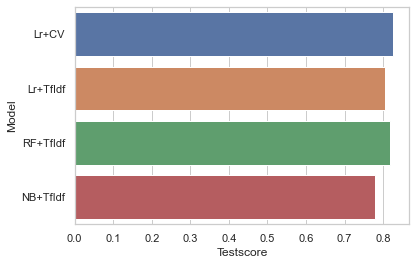

In [41]:
#Plot the models and scores
sns.set(style='whitegrid')
ax = sns.barplot(y="Model",x='Testscore',data = pd.DataFrame(results))

# Model Implementation

Since the Logistic Regression Model performed better and less overfitting than the other models, we will use it to evaluate the overall dataset.

In [42]:
X = df['title_text']
y = df['subreddit']

In [43]:
# Set up Pipeline 
pipe = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=custom_stop_words)),
    ('lr', LogisticRegression()),
])
pipe_params = {
    'tvec__max_features': [500,1000,2000,3000],
     'tvec__min_df': [1,2, 3],
    'tvec__max_df': [0.9,0.95,1.0],
    'tvec__ngram_range': [(1,1),(1, 2)],
}

In [44]:
gs = GridSearchCV(pipe, 
                   param_grid=pipe_params, 
                   cv=5)

In [45]:
gs.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [46]:
gs_model = gs.best_estimator_

In [47]:
gs_model.score(X,y)

0.9042253521126761

In [48]:
coef_names = gs.best_estimator_.named_steps.tvec.get_feature_names()

In [49]:
coef_names

['able',
 'able use',
 'absolutely',
 'access',
 'account',
 'accurate',
 'activate',
 'active',
 'activity',
 'activity app',
 'actually',
 'add',
 'added',
 'adding',
 'advance',
 'advice',
 'ago',
 'airplane',
 'airplane mode',
 'airpods',
 'alarm',
 'alert',
 'allow',
 'allowed',
 'almost',
 'already',
 'also',
 'alternative',
 'aluminum',
 'always',
 'amazon',
 'amp',
 'analog',
 'android',
 'annoying',
 'another',
 'answer',
 'anybody',
 'anymore',
 'anyone',
 'anyone else',
 'anyone know',
 'anything',
 'anything else',
 'anyway',
 'anywhere',
 'aod',
 'app',
 'app phone',
 'apparently',
 'appear',
 'applewatch',
 'appreciate',
 'appreciated',
 'apps',
 'arm',
 'around',
 'ask',
 'asking',
 'audio',
 'australia',
 'auto',
 'automatically',
 'available',
 'average',
 'aw',
 'award',
 'away',
 'back',
 'background',
 'backup',
 'bad',
 'badge',
 'band',
 'barely',
 'based',
 'basically',
 'battery',
 'battery life',
 'become',
 'bed',
 'believe',
 'besides',
 'best',
 'better',
 '

In [50]:
coef_df = pd.DataFrame({'coefficients': coef_names, 'values' : gs.best_estimator_.steps[1][1].coef_[0]})

In [51]:
coef_df.sort_values(by='values',ascending=False, inplace = True)

In [52]:
coef_df.head(20)

,coefficients,values
742,series,4.294024
726,se,2.711734
65,aw,2.212184
430,iphone,2.055873
534,month,1.899780
8,activity,1.492749
479,loop,1.304952
124,calorie,1.283410
762,siri,1.268022
703,ring,1.258066


In [53]:
coef_df.tail(20).sort_values(by = 'values')

,coefficients,values
7,active,-4.941121
711,samsung,-4.573584
374,gw,-3.973978
85,bezel,-3.123984
376,gwa,-2.973314
339,gear,-2.070316
903,update,-1.880878
611,phone,-1.739426
488,lte,-1.736026
869,tizen,-1.593953


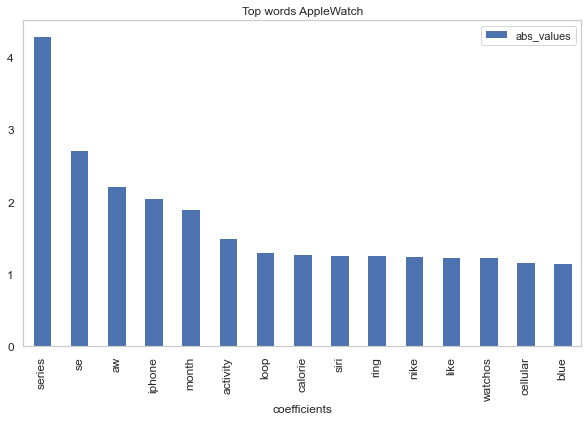

In [54]:
coef_df['abs_values'] = abs(coef_df['values'])
coef_df.head(15).plot(kind = 'bar', x = 'coefficients', y = 'abs_values', 
                      fontsize = 12, figsize = (10, 6), title = 'Top words AppleWatch')
plt.grid(b=None)

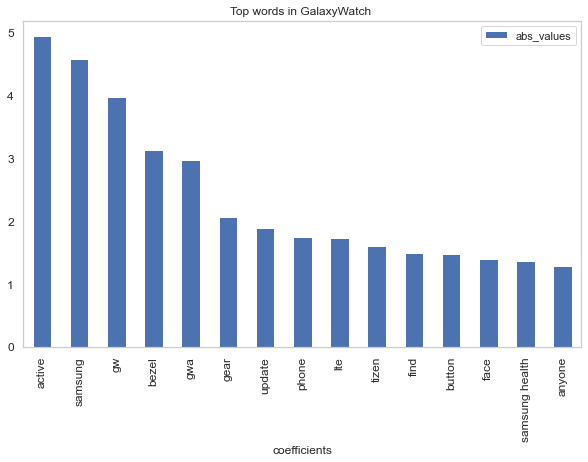

In [55]:
coef_df.tail(15).sort_values(by='values').plot(kind = 'bar', x = 'coefficients', y = 'abs_values',
                      fontsize = 12, figsize = (10, 6), title = 'Top words in GalaxyWatch ')
plt.grid(b=None)


In [56]:
pred = gs_model.predict(X)

In [57]:
confusion_matrix(y, pred)

array([[653, 130],
       [ 40, 952]])

In [58]:
cm = confusion_matrix(y, pred)
cm_df = pd.DataFrame(data=cm, columns=['predicted galaxy', 'predicted apple'], index=['actual galaxy', 'actual apple'])
cm_df

,predicted galaxy,predicted apple
actual galaxy,653,130
actual apple,40,952


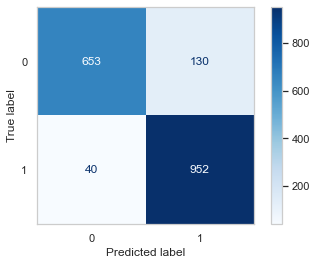

In [59]:
plot_confusion_matrix(gs_model, X, y, cmap='Blues', values_format='d');
plt.grid(b=None)
plt.savefig('confusion_matrix.png', transparent=True)

In [60]:
tn, fp, fn, tp = confusion_matrix(y,pred).ravel()

In [61]:
print(classification_report(y, pred, target_names=['r/apple', 'r/galaxy']))

              precision    recall  f1-score   support

     r/apple       0.94      0.83      0.88       783
    r/galaxy       0.88      0.96      0.92       992

    accuracy                           0.90      1775
   macro avg       0.91      0.90      0.90      1775
weighted avg       0.91      0.90      0.90      1775



In [62]:
accuracy = (tp+tn)/(tp+tn+fn+fp)
accuracy

0.9042253521126761

Since our data is a balanced dataset, we could say that the accuracy is 0.90 indicating that 90% of predictions are correct. Let's find more about the misclassified posts.

In [63]:
df['predicted'] = pred

In [64]:
misclassified = df['subreddit']!=df['predicted']

In [65]:
pd.set_option('max_colwidth', None)
df[misclassified]

,title,selftext,subreddit,title_text,text_len,predicted
4,One of my favorite small things about having an Apple Watch is setting a shortcut automation to change the watch face automatically from my work watch face to casual!,,1,one favorite small thing apple watch setting shortcut automation change watch face automatically work watch face casual,119,0
42,Found some interesting watch faces online but unsure about downloading them.,"If found a website (Applewatchfaces.io) that has a ton of free watch faces. When I clicked on the download option, I assumed it would take me to the App Store to download their app. Instead, it attempted to download the watch face directly to the watch app. I didn’t allow it for obvious reasons. Have any of you ever attempted to use this service? I would like to know if it is a safe service and not something sinister. I’ve searched online but cannot find anything about the site. Thank you in advance!",1,found interesting watch face online unsure downloading found website applewatchfaces io ton free watch face clicked download option assumed would take app store download app instead attempted download watch face directly watch app allow obvious reason ever attempted use service would like know safe service something sinister searched online cannot find anything site thank advance,382,0
44,Daughter rockin' a BLACKPINK watch face she created!,,1,daughter rockin blackpink watch face created,44,0
45,Are the batteries in S0 and S2 38mm same?,"Hi everyone, I need to replace the battery in my gf's S0 38mm. I found the battery, but it says it's for a S2 38mm. Are the batteries the same? Thanks",1,battery mm hi everyone need replace battery gf mm found battery say mm battery thanks,85,0
114,Where can i find this watch band? (From a apple ad),,1,find watch band apple ad,24,0
...,...,...,...,...,...,...
1756,Watch strap recommendations Galaxy 46mm,"Hi guys.\n\nSo the crappy Silicone default strap that came with my galaxy 46mm watch irritated my skin after about a week, I now think I have eczema there! Anyway I bought a nice looking leather strap on Amazon, for it in the UK price was £18.99. And to my dismay I obviously didn't look hard enough because the one I ordered was a bloody leather silicone hybrid so the very part which is on your skin is silicone, annoyed at my incompetence I tried the strap out for a week and yep still get major irritation on my wrist, so that is now in the post having being refunded.\n\nCan anyone recommend or send a link to a strap which doesn't irritate your skin and fits my big wrists? (8inches) I think this is also why I'm getting irritation because it's quite tight. I've never had issues like this with normal watches before.\n\nI'm dubious about going for a metal strap because if it is too small I don't think they send extra links so I will have to send it back again!\n\nThanks guys.\n\nPs just a reminder I'm in the UK and my wrist size is 8 inches or around 21cm.",0,watch strap recommendation galaxy mm hi guy crappy silicone default strap came galaxy mm watch irritated skin week think eczema anyway bought nice looking leather strap amazon uk price dismay obviously look hard enough one ordered bloody leather silicone hybrid part skin silicone annoyed incompetence tried strap week yep still get major irritation wrist post refunded anyone recommend send link strap irritate skin fit big wrist inch think also getting irritation quite tight never issue like normal watch dubious going metal strap small think send extra link send back thanks guy p reminder uk wrist size inch around cm,622,1
1757,"This is my first Smartwatch, I have been using it for a week now and so far I love it",,0,first smartwatch using week far love,36,1
1761,Finally joined the family. Gift from my wife for my birthday. Super excited to get to know it. Any tips and tricks are welcome.,,0,finally joined family gift wife birthday super excited get know tip trick welcome,81,1
1769,Is step counter not possible to be dis

From the misclassified predictions we could see that the most posts do not have selftext resulting in very small title text to process or the people were compairing more about the opposite watch kind.

# Findings

The key tokens of r/AppleWatch includes series, se, aw, iphone, month, activity	,loop, calorie, siri, ring, nike, like, watchos, cellular, blue, challenge, today, complication and workout.

The key tokens of r/GalaxyWatch includes active, samsung, gw, bezel, gwa, gear, update, phone, lte, tizen, find, button, face, samsung health, anyone, bixby.

People from the apple watch subreddit seems to discuss a lot about the recent models, latest features and also discuss their daily usage with [health monitoring](https://support.apple.com/en-gb/guide/watch/apd0d5d452ce/watchos). Also, people talk more about the monthly challenges, exercise ring, workout app and activity app in r/AppleWatch subreddits. The most popular [ring](https://www.apple.com/sg/watch/close-your-rings/) feature also became a top classifier along with 'blue' keyword(representing Stand). [Loop](https://www.apple.com/sg/shop/watch/bands/sport-loop) model also topped in the classification due to its excellent review than Sport band and buckle models.

Whereas people in r/GalaxyWatch talk more about featires such as OS,updates, bezel and buttons. There seemed to be issue with the galaxy watch [buttons](https://www.techgenyz.com/2020/08/27/samsung-gear-home-and-back-buttons-stop-working/) which was reflected in the posts and hence appeared in top classifiers of galaxy subreddit. 

Both subredditers were also interested in cellular/lte models thus contributing to top classifiers.

# Conclusion and Recommendations

We could see that the two subreddits were classified with 90% accuracy and also there seemed to be quite a bit of overfitting.Three classification models were used for evaluation of the corpus - Logistic , Random Forest and MultinomialNB. The Logistic approach we get coefficients that estimate how our independent variables(text features) affect our dependent variable(correct subreddit). It therefore is a very good model to use because the dataset is not very big and the model is not being overwhelmed by many features. 

The Logistic Regression with TFIDF Vecotizer is our best performer followed by Random Forest with TFIDF. Further explorations should include using: A boosting algorithm for classification like AdaBoost or Gradient boost. Collecting more and reevaluate the performance of models with additional stop words after model iterations and also ensemble trees with bagging and boosting.

The findings can be used by companies or the users to better understand the top features that people are discussing and further sentiment analysis on this data could be used to find the positive or negative review about the watches.